In [25]:
using Polynomials, Plots, QuadGK, DataFrames

### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

#### Wykresy wielomianów Legendre'a

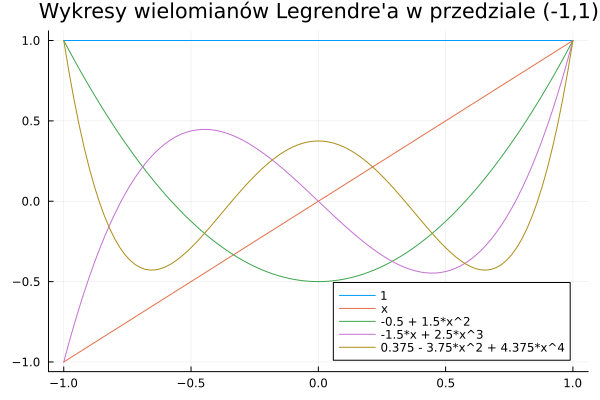

In [40]:
p0 = Polynomial([1])
p1 = Polynomial([0,1])
p2 = 3/2*p1*p1 - 1/2*p0
p3 = 5/3*p1*p2 - 2/3*p1
p4 = 7/4*p1*p3 - 3/4*p2
xs = -1:1
plot(p0,extrema(xs)...)
plot!(p1,extrema(xs)...)
plot!(p2,extrema(xs)...)
plot!(p3,extrema(xs)...)
plot!(p4,extrema(xs)..., title = "Wykresy wielomianów Legrendre'a w przedziale (-1,1)")

#### Porównanie zer z odciętymi punktów Gaussa

In [27]:
compare = DataFrame(
    polynomial = 2:4,
    roots = [roots(p) for p in [p2, p3, p4]],
    gauss = [gauss(Float64, i)[1] for i in 2:4]
)

Row,polynomial,roots,gauss
,Int64,Array…,Array…
1,2,"[-0.57735, 0.57735]","[-0.57735, 0.57735]"
2,3,"[-0.774597, 0.774597, 0.0]","[-0.774597, 0.0, 0.774597]"
3,4,"[-0.861136, -0.339981, 0.339981, 0.861136]","[-0.861136, -0.339981, 0.339981, 0.861136]"


#### Związek z podstawowym twierdzeniem kwadratur Gaussa
Zera wielomianów ortogonalnych są ściśle powiązane z abscysami kwadratury Gaussa. Konkretnie, zera wielomianu ortogonalnego stopnia n+1 są abscysami n-punktowej kwadratury Gaussa dla tego samego wielomianu ortogonalnego stopnia n. Innymi słowy, jeśli znamy zera wielomianu ortogonalnego stopnia n+1, możemy użyć ich jako abscysy do wyznaczenia współczynników kwadratury Gaussa dla wielomianu ortogonalnego stopnia n.

### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

#### Funkcja obliczająca całkę na przedziale (-1,1)

In [28]:
function gauss_integral(k,f)
    roots, coeffs = gauss(k)
    return sum(coeffs.*f.(roots))
end

for k in 2:10
    f(x) = x^k
    exact = k % 2 == 0 ? 2/(k+1) : 0 #dokładna wartość całki zależnie od k
    approx = gauss_integral(3, f)
    diff = abs(exact-approx)
    println("k = $k: exact = $exact, approx = $approx, diff = $diff")
end

k = 2: exact = 0.6666666666666666, approx = 0.6666666666666667, diff = 1.1102230246251565e-16
k = 3: exact = 0, approx = 0.0, diff = 0.0


k = 4: exact = 0.4, approx = 0.4000000000000001, diff = 5.551115123125783e-17
k = 5: exact = 0, approx = 0.0, diff = 0.0
k = 6: exact = 0.2857142857142857, approx = 0.24000000000000005, diff = 0.04571428571428565
k = 7: exact = 0, approx = 0.0, diff = 0.0


k = 8: exact = 0.2222222222222222, approx = 0.14400000000000007, diff = 0.07822222222222214
k = 9: exact = 0, approx = 0.0, diff = 0.0
k = 10: exact = 0.18181818181818182, approx = 0.08640000000000003, diff = 0.09541818181818179


#### Związek z twierdzeniem o stopniu dokładności kwadratury Gaussa
Funkcja traci dokładność przy stopniu wielomianu równym 6, co wynika z twierdzenia o stopniu dokładności kwadratury Gaussa, która jest dokładna dla wielomianu o stopniu co najwyżej 2n-1 (czyli 5), dla kwadratury równej n (czyli 3).

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [29]:
function normalized_integral(k,f,a,b)
    (roots,coeffs) = gauss(k)
    roots = (b-a)/2 * roots .+ (b+a)/2
    value = (b-a)/2 * sum(coeffs.*f.(roots))
    return value
end

# Przykładowe użycie funkcji
f(x) = 2x^2 + x + 1
exact = 10/3
println("f(x) = x^3 + 2x^2 + x + 1: ")
for k in 1:5
    approx = normalized_integral(k, f, -1, 1)
    diff = abs(exact - approx)
    println("Quadrate = $k, Interval = (-1,1), Exact = $exact, Approx = $approx, Diff = $diff")
end

f(x) = exp(x)
exact = exp(1) - 1
println("f(x) = exp(x): ")
for k in 1:5
    approx = normalized_integral(k, f, 0, 1)
    diff = abs(exact - approx)
    println("Quadrate = $k, Interval = (0,1), Exact = $exact, Approx = $approx, Diff = $diff")
end

f(x) = cos(x)
exact = 1
println("f(x) = cos(x): ")
for k in 1:5
    approx = normalized_integral(k, f, 0, pi/2)
    diff = abs(exact - approx)
    println("Quadrate = $k, Interval = (0,pi/2), Exact = $exact, Approx = $approx, Diff = $diff")
end

f(x) = x^3 + 2x^2 + x + 1: 


Quadrate = 1, Interval = (-1,1), Exact = 3.3333333333333335, Approx = 2.0, Diff = 1.3333333333333335
Quadrate = 2, Interval = (-1,1), Exact = 3.3333333333333335, Approx = 3.333333333333333, Diff = 4.440892098500626e-16
Quadrate = 3, Interval = (-1,1), Exact = 3.3333333333333335, Approx = 3.333333333333333, Diff = 4.440892098500626e-16
Quadrate = 4, Interval = (-1,1), Exact = 3.3333333333333335, Approx = 3.333333333333334, Diff = 4.440892098500626e-16
Quadrate = 5, Interval = (-1,1), Exact = 3.3333333333333335, Approx = 3.333333333333333, Diff = 4.440892098500626e-16
f(x) = exp(x): 
Quadrate = 1, Interval = (0,1), Exact = 1.718281828459045, Approx = 1.6487212707001282, Diff = 0.0695605577589169
Quadrate = 2, Interval = (0,1), Exact = 1.718281828459045, Approx = 1.7178963780075036, Diff = 0.0003854504515414803
Quadrate = 3, Interval = (0,1), Exact = 1.718281828459045, Approx = 1.7182810043725216, Diff = 8.240865234654393e-7
Quadrate = 4, Interval = (0,1), Exact = 1.718281828459045, Appro

Quadrate = 1, Interval = (0,pi/2), Exact = 1, Approx = 1.1107207345395915, Diff = 0.11072073453959153
Quadrate = 2, Interval = (0,pi/2), Exact = 1, Approx = 0.9984726134041145, Diff = 0.0015273865958854715
Quadrate = 3, Interval = (0,pi/2), Exact = 1, Approx = 1.0000081215554983, Diff = 8.121555498341593e-6
Quadrate = 4, Interval = (0,pi/2), Exact = 1, Approx = 0.9999999771971152, Diff = 2.2802884802608503e-8
Quadrate = 5, Interval = (0,pi/2), Exact = 1, Approx = 1.0000000000395648, Diff = 3.956479588396178e-11


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

#### Przykładowy wielomian

In [30]:
f(x) = x^3 + 2x^2 + x + 1
exact = 10/3
result, err = quadgk(f, -1, 1)
println("f(x) = x^3 = 2x^2 + x + 1")
println("Interval = (-1,1), Result = $result, Exact = $exact, Error = $err")

f(x) = x^3 = 2x^2 + x + 1
Interval = (-1,1), Result = 3.333333333333333, Exact = 3.3333333333333335, Error = 0.0


#### Całka od minus do plus nieskończoności rozkładu normalnego Gaussa

In [31]:
f(x) = exp(-x^2/2) / sqrt(2π)
exact = 1
result, err = quadgk(f, -Inf, Inf)
println("Gauss normal distribution")
println("Result = $result, Exact = $exact, Error = $err")

Gauss normal distribution
Result = 1.0000000000032583, Exact = 1, Error = 1.4395584997015688e-8


### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)


#### Implementacje funkcji całkujących

In [39]:
# Metoda prostokątów
function rectangular_rule(f, a, b, n)
    h = (b-a)/n
    return h*sum([f(a + i*h) for i in 0:n-1])
end

# Metoda trapezów 
function trapezoidal_rule(f, a, b, n)
    h = (b - a) / n
    nodes = range(a, stop=b, length=n+1)
    value = h * (sum(f.(nodes)) - (f(a) + f(b)) / 2)
    return value
end

# Metoda Simpsona
function simpson_rule(f, a, b, n)
    h = (b - a) / n
    st_sum = sum(f.(a + h/2:h:b - h/2))
    mid_sum = sum(f.(a + h:h:b - h))
    simpson_sum = f(a) + f(b) + 4 * st_sum + 2 * mid_sum
    return (h / 6) * simpson_sum
end



simpson_rule (generic function with 1 method)

#### Wykresy funkcji błędu dla funkcji wykładniczej

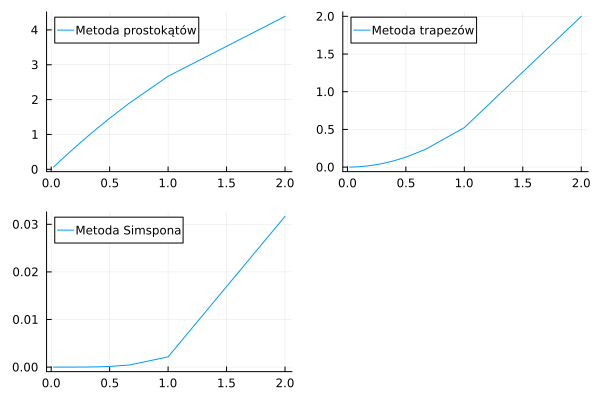

In [43]:
f(x) = exp(x)
a = 0
b = 2
expected = exp(2)-1
xs = Float64[]
rectangleError = Float64[]
trapezzeError = Float64[]
simpsonError = Float64[]

for n in 1:100
    push!(xs,(b-a)/n)
    push!(rectangleError,abs(expected-rectangular_rule(f,a,b,n)))
    push!(trapezzeError,abs(expected-trapezoidal_rule(f,a,b,n)))
    push!(simpsonError,abs(expected-simpson_rule(f,a,b,n)))
end

plot(
    xs,
    [rectangleError, trapezzeError, simpsonError],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    layout=3,
)
     

#### Wykresy funkcji błędu dla funkcji trygonometrycznej

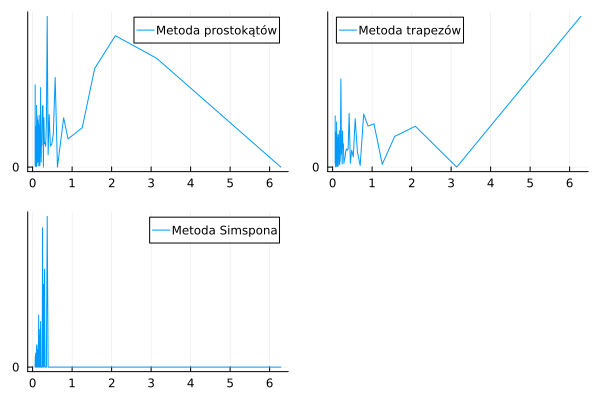

In [38]:
f(x) = sin(x)
a = 0
b = 2*pi
expected = 0
xs = Float64[]
rectangleError = Float64[]
trapezzeError = Float64[]
simpsonError = Float64[]

for n in 1:100
    push!(xs,(b-a)/n)
    push!(rectangleError,abs(expected-rectangular_rule(f,a,b,n)))
    push!(trapezzeError,abs(expected-trapezoidal_rule(f,a,b,n)))
    push!(simpsonError,abs(expected-simpson_rule(f,a,b,n)))
end

plot(
    xs,
    [rectangleError, trapezzeError, simpsonError],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    layout=3,
    yticks = 0:0.1:1
)